<a href="https://colab.research.google.com/github/Bendeguzfrks04/DeepML/blob/main/Readshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, cluster
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import neighbors, ensemble, linear_model
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

from collections import Counter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def RMSE(sol, true):
    return sqrt( ((sol - true)**2).mean() )

In [4]:
df = pd.read_csv("train.csv")
dtest = pd.read_csv("testX.csv")

In [63]:

dtest.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,ID
0,18.57944,16.71833,15.88108,15.49288,15.18320,13.970513,-9.813933,0
1,19.06882,17.68395,17.20045,16.92310,16.77381,117.641289,20.548117,1
2,18.72212,17.65607,17.32132,17.13485,16.99749,246.700110,20.644097,2
3,19.48814,18.26634,17.63848,17.28905,17.06759,210.136692,50.270590,3
4,20.12428,18.22417,17.23645,16.80466,16.46161,180.986323,-3.104493,4


In [64]:
df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec
0,19.18902,17.12673,16.17146,15.72892,15.38018,221.626406,1.104141
1,19.71668,17.91488,17.06592,16.67560,16.41773,177.530289,43.921268
2,19.73791,18.18637,17.31132,16.86139,16.57027,244.887682,35.063165
3,19.29196,17.68699,16.91789,16.54745,16.24734,176.583097,11.647798
4,19.99879,18.26889,17.44174,17.05618,16.75268,168.444269,41.977939


In [47]:
df.shape, df.isna().sum()

((250000, 8), dered_u     0
 dered_g     0
 dered_r     0
 dered_i     0
 dered_z     0
 ra          0
 dec         0
 redshift    0
 dtype: int64)

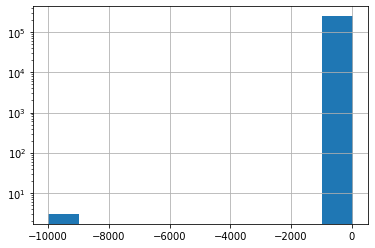

In [48]:
df.dered_u.hist()
plt.yscale('log')

In [5]:
df = df[df.dered_u > -2000]
df.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec,redshift
count,249997.000000,249997.000000,249997.000000,249997.000000,249997.000000,249997.000000,249997.000000,249997.000000
mean,19.407247,17.762655,16.927524,16.530976,16.247397,184.730362,24.308970,0.107049
std,0.986641,0.821859,0.750838,0.748183,0.765521,60.202119,18.673098,0.051698
min,13.595700,11.820110,11.050980,10.665400,10.419470,0.006459,-11.244081,0.000024
25%,18.837330,17.369710,16.598140,16.203610,15.904070,150.977786,9.281423,0.069596
50%,19.476430,17.942600,17.146300,16.742100,16.442920,185.848968,22.591997,0.101094
75%,20.094800,18.335390,17.474220,17.064700,16.775990,221.650490,38.153846,0.138922
max,30.066060,25.775880,18.670300,24.333480,26.726530,359.994924,70.268882,0.693718


In [6]:
data = df.pop('redshift')
X_train, X_test, Y_train, Y_test = train_test_split(df.values, data.values, test_size=0.20, random_state=42)

In [51]:
data

0         0.073469
1         0.067499
2         0.121360
3         0.083287
4         0.098327
            ...   
249995    0.101716
249996    0.063706
249997    0.157300
249998    0.032358
249999    0.139342
Name: redshift, Length: 249997, dtype: float64

In [52]:
df.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,ra,dec
0,19.18902,17.12673,16.17146,15.72892,15.38018,221.626406,1.104141
1,19.71668,17.91488,17.06592,16.67560,16.41773,177.530289,43.921268
2,19.73791,18.18637,17.31132,16.86139,16.57027,244.887682,35.063165
3,19.29196,17.68699,16.91789,16.54745,16.24734,176.583097,11.647798
4,19.99879,18.26889,17.44174,17.05618,16.75268,168.444269,41.977939


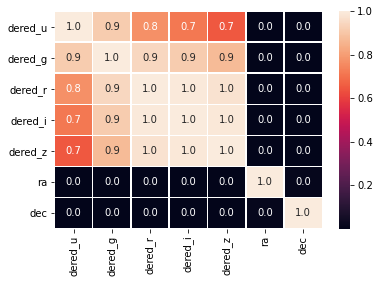

In [53]:
sns.heatmap(df.corr(), annot=True , linewidths=.5, fmt= '.1f')

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
#Models
kmeans = cluster.KMeans(n_clusters=2, random_state=42)
rf     = ensemble.RandomForestClassifier(random_state=42)
dt     = DecisionTreeClassifier()
lr     = linear_model.LogisticRegression()

In [31]:
knn = KNeighborsRegressor(10)
knn.fit(X_train, Y_train)
preds = knn.predict(X_test)
RMSE(preds, Y_test)


0.036662540772142635

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
norma = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
norma.mean(0), norma.std(0)

(array([-2.23417651e-13,  2.16895563e-13,  1.13229587e-13, -3.05770692e-13,
         4.26977418e-13,  3.81594773e-14, -9.06342551e-15]),
 array([1., 1., 1., 1., 1., 1., 1.]))

In [82]:
knn = KNeighborsRegressor(20)
knn.fit(norma, Y_train)
preds = knn.predict(X_test_scaled)

RMSE(preds, Y_test)

0.02725192292490721

In [110]:
knn.fit(norma[:,0:5], Y_train)  #fit only on the magnitudes
preds = preds = knn.predict(X_test_scaled[:,0:5]) #predict only on the magnitudes

RMSE(preds, Y_test)

0.021652984263188124

array([[-1.12697162, -1.278695  , -1.29104949, ..., -1.28786543,
        -0.01006568,  0.36682754],
       [-0.80259695, -0.95454023, -0.94647426, ..., -0.93707146,
        -0.90122697,  0.15314046],
       [-0.28598595, -0.39207935, -0.30647647, ..., -0.21573152,
         0.63640911, -0.86853274],
       ...,
       [-0.13677096,  0.32221797,  0.67992245, ...,  0.79679368,
         0.68511148,  0.56832714],
       [ 0.05352736, -0.03363383,  0.021679  , ..., -0.01971381,
        -0.36309216,  0.59388419],
       [-1.30903096, -1.37460194, -1.34370737, ..., -1.30696426,
        -0.9280648 , -0.78904984]])

In [294]:
X_train_scaled_extrafeatures = numpy.zeros((199997, 4))

for i in range(199997):
  X_train_scaled_extrafeatures[i][0] = (norma[:,1:2] - norma[:,0:1])[i]
  X_train_scaled_extrafeatures[i][1] = (norma[:,2:3] - norma[:,1:2])[i]
  X_train_scaled_extrafeatures[i][2] = (norma[:,3:4] - norma[:,2:3])[i]
  X_train_scaled_extrafeatures[i][3] = (norma[:,4:5] - norma[:,3:4])[i]
#X_train_scaled_extrafeatures = [new1, new2, new3, new4]

In [293]:
w= []
for i in range(1,1998):
  w[i] = i

IndexError: ignored

In [292]:
w

1995003

In [191]:
ne4 = X_test_scaled[:,4:5] - X_test_scaled[:,3:4]
ne3 = X_test_scaled[:,3:4] - X_test_scaled[:,2:3]
ne2 = X_test_scaled[:,2:3] - X_test_scaled[:,1:2]
ne1 = X_test_scaled[:,1:2] - X_test_scaled[:,0:1]
X_test_scaled_extrafeatures = [ne1.T, ne2.T, ne3.T, ne4.T]

In [255]:
xtrain = []
for i in enumerate():
  xtrain[i][0] += new1[i][0],new2[i][0], new3[i][0], new4[i][0]
  xtrain[i][1] += new1[1],new2[1], new3[1], new4[1]
  xtrain[i][2] += new1[2],new2[2], new3[2], new4[2]
  xtrain[i][3] += new1[3],new2[3], new3[3], new4[3]
shape(xtrain)

IndexError: ignored

In [251]:
split = np.array_split(X_train_scaled_extrafeatures, 199997, axis=0)

In [243]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n))
#print( list(split(range(11), 3)) )  # [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10]]

In [250]:
#t = split(xtrain ,199997)
shape(divide(xtrain,4))

(799988, 1)

In [245]:
shape(t)

()

In [231]:
a#below 3 point baseline
knn.fit(split, Y_train)
preds = knn.predict(X_test_scaled_extrafeatures)

RMSE(preds, Y_test)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [199]:
shape(X_train_scaled_extrafeatures)

(4, 199997, 1)

In [182]:
X_train_scaled_extrafeatures.reshape(199997, 7)

AttributeError: ignored

In [197]:
shape(new1,new2)

TypeError: ignored

In [195]:
shape(norma)

(199997, 7)